## Boosting

**`Boosting`** es una clase de algoritmos de aprendizaje automático de **"conjunto"** que implica combinar las predicciones de muchos **"aprendices débiles"**. En esta clase de algoritmos los modelos se agregan secuencialmente y los modelos posteriores en la secuencia corrigen las predicciones realizadas por los modelos anteriores en la secuencia.

Un **"aprendiz débil"** es un modelo que es muy simple pero que puede dar buenos resultados.

## AdaBoost (Adaptive Boosting)

**`AdaBoost` es un método de aprendizaje supervisado** que se inventó inicialmente para **aumentar la eficiencia de los clasificadores binarios**. **`AdaBoost`** utiliza un enfoque iterativo para aprender de los errores de los clasificadores débiles y convertirlos en clasificadores fuertes.

El algoritmo **`AdaBoost`** implica el uso de árboles de decisión (**`DecisionTrees`**) muy cortos (de profundidad 1, también son conocidos como **Stumps**) como aprendices débiles que se agregan secuencialmente al conjunto. Cada modelo posterior intenta corregir las predicciones realizadas por el modelo anterior en la secuencia. Esto se logra al examinar el conjunto de datos de entrenamiento para centrarse más en las instancias de entrenamiento en los que los modelos anteriores cometieron errores de predicción.

El algoritmo de entrenamiento implica **comenzar con un árbol de decisión**, encontrar aquellas **instancias en el conjunto de datos de entrenamiento que se clasificaron incorrectamente** y **agregar más peso a esas instancias**. Se entrena otro árbol con los mismos datos, aunque ahora ponderado por los errores de clasificación. Este proceso se repite tantas veces como el usuario quiera.


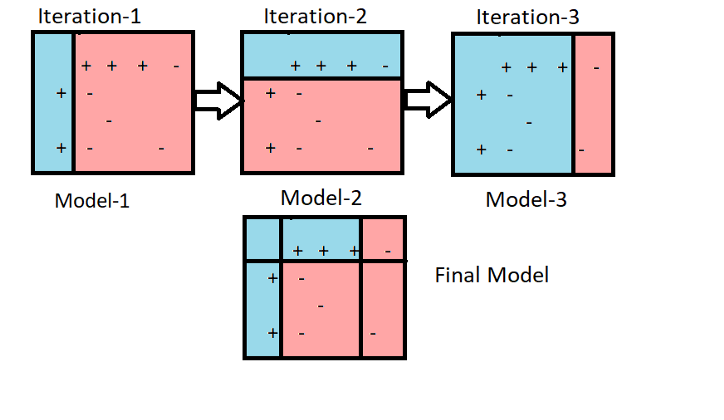

_**Documentación**: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html_

Aunque en la teoria se habla de **`DecisionTrees`**, la función de **`Sklearn`** nos permite usar diferentes modelos.

In [1]:
import numpy as np
import pandas as pd

import matplotlib # Para ver la versión
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn # Para ver la versión

from sklearn import datasets

# Train, Test
from sklearn.model_selection import train_test_split

# Metricas
from sklearn.metrics import jaccard_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [2]:
# Versiones

print(f"numpy=={np.__version__}")
print(f"pandas=={pd.__version__}")
print(f"matplotlib=={matplotlib.__version__}")
print(f"seaborn=={sns.__version__}")
print(f"scikit-learn=={sklearn.__version__}")

numpy==1.20.3
pandas==1.2.4
matplotlib==3.4.2
seaborn==0.11.1
scikit-learn==1.5.1


In [3]:
iris = datasets.load_iris()
X = iris.data[:100, :2]
y = iris.target[:100]

# En esta ocasión vamos a quedarnos con las primeras 2 clases y solo las primeras 2 columnas

### Train, Test

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"X_test: {X_test.shape},  y_test: {y_test.shape}")

X_train: (70, 2), y_train: (70,)
X_test: (30, 2),  y_test: (30,)


### Modelo

In [5]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [6]:
model = AdaBoostClassifier(n_estimators = 50)
model.fit(X_train, y_train)

# Por defecto usa DecisionTreeClassifier()

/Users/federicollanes/miniforge3/envs/fede/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier()

In [7]:
# AdaBoost usando como base LogisticRegression()

# model = AdaBoostClassifier(base_estimator = LogisticRegression(), n_estimators = 50)
# model.fit(X_train, y_train)

# Por defecto usa DecisionTreeClassifier()

### Predicciones

In [8]:
yhat = model.predict(X_test)

yhat

array([1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1])

In [9]:
print("Jaccard Index:", jaccard_score(y_test, yhat, average = "macro"))
print("Accuracy:"     , accuracy_score(y_test, yhat))
print("Precisión:"    , precision_score(y_test, yhat, average = "macro"))
print("Sensibilidad:" , recall_score(y_test, yhat, average = "macro"))
print("F1-score:"     , f1_score(y_test, yhat, average = "macro"))

Jaccard Index: 1.0
Accuracy: 1.0
Precisión: 1.0
Sensibilidad: 1.0
F1-score: 1.0


### Confusion Matrix

In [10]:
confusion_matrix(y_test, yhat, labels = [0, 1])

array([[17,  0],
       [ 0, 13]])

### Atributos y Métodos

In [ ]:
# .predict_proba()


np.round(model.predict_proba(X_test), 4)


# Redondeado a 4 decimales para quitar la notación científica

In [11]:
# .estimator_ es el modelo base sobre el cual se va adaptando.

model.estimator_

DecisionTreeClassifier(max_depth=1)

In [12]:
# .estimators_ lista de modelos generados

model.estimators_

[DecisionTreeClassifier(max_depth=1, random_state=2101803495),
 DecisionTreeClassifier(max_depth=1, random_state=1838676425),
 DecisionTreeClassifier(max_depth=1, random_state=1141282164),
 DecisionTreeClassifier(max_depth=1, random_state=131860700),
 DecisionTreeClassifier(max_depth=1, random_state=977875443),
 DecisionTreeClassifier(max_depth=1, random_state=1596233461),
 DecisionTreeClassifier(max_depth=1, random_state=557099563),
 DecisionTreeClassifier(max_depth=1, random_state=262864909),
 DecisionTreeClassifier(max_depth=1, random_state=333632536),
 DecisionTreeClassifier(max_depth=1, random_state=873852560),
 DecisionTreeClassifier(max_depth=1, random_state=812913703),
 DecisionTreeClassifier(max_depth=1, random_state=756339708),
 DecisionTreeClassifier(max_depth=1, random_state=1288435453),
 DecisionTreeClassifier(max_depth=1, random_state=1263898570),
 DecisionTreeClassifier(max_depth=1, random_state=1425718163),
 DecisionTreeClassifier(max_depth=1, random_state=522547369),
 

In [13]:
# .estimator_errors_ retorna el error de los modelos generados

np.round(model.estimator_errors_, 3)

# Redondeado a 3 decimales para quitar la notación científica

array([0.114, 0.103, 0.231, 0.139, 0.184, 0.166, 0.102, 0.01 , 0.01 ,
       0.101, 0.109, 0.112, 0.132, 0.162, 0.2  , 0.207, 0.26 , 0.234,
       0.249, 0.23 , 0.241, 0.241, 0.143, 0.09 , 0.091, 0.112, 0.032,
       0.224, 0.261, 0.18 , 0.184, 0.173, 0.216, 0.216, 0.085, 0.022,
       0.242, 0.287, 0.055, 0.095, 0.016, 0.047, 0.222, 0.267, 0.204,
       0.209, 0.196, 0.202, 0.202, 0.091])

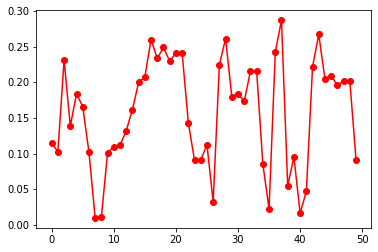

In [14]:
plt.plot(model.estimator_errors_, marker = "o", color = "red", linestyle = "-")
plt.show()

In [15]:
# .feature_importances_ retorna la importancia de cada columna

model.feature_importances_

array([0.52, 0.48])

In [17]:
X_test.shape

(30, 2)

In [16]:
# .decision_function() retorna la "transformación" de una instancia 
# Esta "tranasformacion" es un array de n elementos (uno para cada clase)
# La suma de cada array debe dar 0, o muy cerca de 0
# Es muy parecido a .predict_proba()

# Cuando la clasificación es binaria retorna un unico valor
# Que clasifica la instancia dependiendo de que tan cerca este del 0 o el 1.

model.decision_function(X_test)

array([ 5.91035595,  3.33793798,  2.45655777, -3.2472961 , -3.26409207,
       -2.52800283, -6.29768769,  3.33793798, -1.89325087, -3.26409207,
       -1.44622435, -4.60795838,  5.91035595, -1.80558952,  3.33793798,
       -4.08940457,  5.91035595,  3.81722005, -3.2472961 , -1.15716163,
        3.69730314,  1.60416724, -3.35331533, -4.60795838,  3.69730314,
       -1.44622435, -4.08940457,  2.80885036, -2.39967527,  5.91035595])

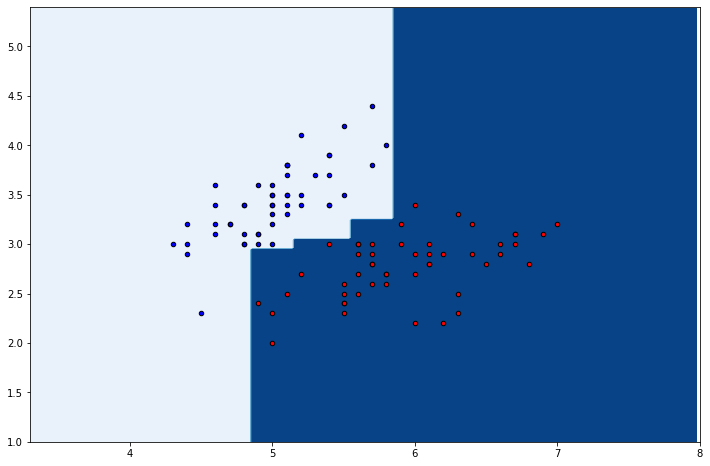

In [19]:
plt.figure(figsize = (12, 8))

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

# Creación de la Malla
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Calculo de los puntos en Z
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)


cs = plt.contourf(xx, yy, Z, cmap = "Blues")
plt.axis("tight")

# Plot de los puntos
for i, n, c in zip(range(2), "AB", "br"):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1],
                c = c, cmap = plt.cm.Paired,
                s = 20, edgecolor = "k",
                label = "Class %s" % n)
    
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

plt.show()

### Parámetros del Modelo (Tuning)

#### Parametros de AdaBoostClassifier()

base_estimator: Este parámetro permite especificar el clasificador débil que se utilizará en cada iteración. Por defecto, se utiliza un árbol de decisión de profundidad 1 (DecisionTreeClassifier(max_depth=1) para clasificación y DecisionTreeRegressor(max_depth=1) para regresión). Puedes proporcionar tu propio estimador personalizado como valor.

n_estimators: Este parámetro determina el número de estimadores débiles (clasificadores débiles) que se utilizarán en el conjunto. Cuanto mayor sea este valor, más complejo será el conjunto final y mejor será la capacidad de adaptación del modelo. Sin embargo, aumentar demasiado este valor también puede llevar al sobreajuste. Por defecto, es igual a 50.

learning_rate: El parámetro de tasa de aprendizaje controla la contribución de cada clasificador débil en el conjunto final. Un valor más bajo penalizará menos los errores cometidos por los clasificadores débiles anteriores. El valor predeterminado es 1.0.

algorithm: Este parámetro permite especificar el algoritmo utilizado para calcular los pesos de las muestras en cada iteración. Puedes elegir entre "SAMME" (Stagewise Additive Modeling using a Multiclass Exponential loss function) o "SAMME.R" (SAMME con probabilidades estimadas). En la mayoría de los casos, "SAMME.R" se recomienda ya que generalmente funciona mejor. Por defecto, se utiliza "SAMME.R".

random_state: Controla la aleatoriedad en la selección de muestras y otros procesos internos del algoritmo. Si deseas que los resultados sean reproducibles, establece este valor en una semilla (seed) específica.



- **`estimator`**: int, **`default`** = DecisionTreeClassifier(max_depth=1)
    - Especifíca el modelo "debil" que se utilizará en cada iteración.

___

- **`n_estimators`**: int, **default** = 50
    - Número de estimadores débiles que se utilizarán en el conjunto.

___

- **`learning_rate`**: float, **default** = 1.0
    - Tasa de aprendizaje controla la contribución de cada modelo débil en el conjunto final. Un valor más bajo penalizará menos los errores cometidos por los clasificadores débiles anteriores.
        
___

- **`algorithm`**: {"SAMME.R", "SAMME"}, **default** = "SAMME.R"
    - Permite especificar el algoritmo utilizado para calcular los pesos de las muestras en cada iteración.
    
    - **"SAMME"**: Stagewise Additive Modeling using a Multiclass Exponential loss function.
        - Es un algoritmo que se utiliza en Gradient Boosting para problemas de clasificación multiclase.
        - Se basa en la minimización de una función de pérdida exponencial en cada iteración del proceso de ajuste.
        - En cada iteración, el algoritmo ajusta un modelo débil y asigna un peso a ese modelo según su capacidad para corregir los errores cometidos por los modelos anteriores.
        - Tiende a asignar una mayor importancia a las clases que son más difíciles de clasificar.
        
    - **"SAMME.R"**: Stagewise Additive Modeling using a Multiclass Exponential loss function with Real-valued Predictions.
        - Es una extensión de SAMME que aborda una limitación de SAMME relacionada con la necesidad de que los clasificadores débiles generen predicciones de clases discretas.
        - Permite que los clasificadores débiles generen predicciones con valores reales en lugar de clases discretas. Esto lo hace más flexible y puede tener un mejor rendimiento en algunos casos.
        - SAMME.R utiliza una función de pérdida exponencial modificada que tiene en cuenta las probabilidades en lugar de las clases discretas. Esto puede conducir a un mejor rendimiento y convergencia más rápida en problemas de clasificación multiclase.
        
    - En la mayoría de los casos "SAMME.R" da mejores resultados y puede manejar una variedad más amplia de situaciones.
        
___

In [ ]:
################################################################################################################################

### Ejercicio 1:
- Utiliza el dataset de **`titanic_preprocesamiento.csv`** para practicar este modelo.
    - Prueba con diferentes modelos de clasificación y diferente número de estimadores.

In [20]:
df = pd.read_csv("../Data/titanic_preprocesamiento.csv")

X = df.drop(["Survived"], axis = 1)
y = df["Survived"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import NearestCentroid
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
modelos = [LogisticRegression(), KNeighborsClassifier(), RadiusNeighborsClassifier(),
           GaussianNB(), NearestCentroid(), SVC(), DecisionTreeClassifier(), RandomForestClassifier()]

In [ ]:
for modelo in modelos:
    
    try:
        model = AdaBoostClassifier(estimator = modelo, n_estimators = 50, algorithm = "SAMME", random_state = 42)
        model.fit(X_train, y_train)
        
        yhat = model.predict(X_test)
        
        print(modelo)
        print("Jaccard Index:", jaccard_score(y_test, yhat, average = "macro"))
        print("Accuracy:"     , accuracy_score(y_test, yhat))
        print("Precisión:"    , precision_score(y_test, yhat, average = "macro"))
        print("Sensibilidad:" , recall_score(y_test, yhat, average = "macro"))
        print("F1-score:"     , f1_score(y_test, yhat, average = "macro"))
        print("ROC AUC:"      , roc_auc_score(y_test, yhat))
        
        print("*"*100)
    except:
        continue

In [22]:
from sklearn.model_selection import GridSearchCV

In [29]:
%%time

model = AdaBoostClassifier()

params = {"n_estimators"   : [20],
          "learning_rate"  : [0.4]}

scorers = ["f1_macro", "accuracy", "recall_macro", "roc_auc"]

grid_solver = GridSearchCV(estimator  = model    , 
                           param_grid = params   , 
                           scoring    = scorers  ,
                           cv         = 5        ,
                           refit      = "accuracy",
                           n_jobs     = -1        )

model_result = grid_solver.fit(X, y)

print(model_result.cv_results_["mean_test_recall_macro"].mean())
print(model_result.cv_results_["mean_test_f1_macro"].mean())
print(model_result.cv_results_["mean_test_accuracy"].mean())

print("*"*100)

print(model_result.best_score_)
print(model_result.best_params_)

0.772929663535467
0.7742706869251961
0.7876818181818181
****************************************************************************************************
0.7876818181818181
{'learning_rate': 0.4, 'n_estimators': 20}
CPU times: user 111 ms, sys: 23.9 ms, total: 135 ms
Wall time: 832 ms


/Users/federicollanes/miniforge3/envs/fede/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [24]:
[1/(10**i) for i in range(1, 4)]

[0.1, 0.01, 0.001]

In [ ]:
################################################################################################################################

In [31]:
preds

array([0, 2, 0, 0, 0, 1, 0, 1, 2, 2, 0, 0, 1, 1, 1, 2, 2, 2, 1, 0, 1, 1,
       2, 1, 1, 0, 2, 0, 0, 2])